# Problem 2: Superdense Coding (Bell State)

## Part A (Qiskit)

### Imports

In [8]:
# Required Imports

from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram

### Create Quantum Circuit

In [9]:
# Create a circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

### Qubit Mapping

- **q0** → Alice's qubit (used for encoding the classical message)  
- **q1** → Bob's qubit (used for decoding the message)  

### Step 1: Create Bell Pair

In [11]:
# Create shared Bell state between Alice and Bob
qc.h(0)
qc.cx(0, 1)

In [12]:
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())

This prepares:

$$
|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}
$$

### Step 2: Encode Message '11'

### Encoding Rule

Alice encodes the 2-bit classical message using the following single-qubit operations on her qubit:

- **00** → Identity ($I$)  
- **01** → Pauli-$Z$  
- **10** → Pauli-$X$  
- **11** → Pauli-$X$ followed by Pauli-$Z$  

In [13]:
# Encoding message '11' on Alice's qubit (q0)
qc.x(0)
qc.z(0)

In [14]:
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())

### Step 3: Bell-Basis Decoding

In [15]:
# Decode back to computational basis
qc.cx(0, 1)
qc.h(0)

In [16]:
qc.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=2, num_clbits=0, params=[]), qubits=(<Qubit register=(2, "q"), index=0>, <Qubit register=(2, "q"), index=1>), clbits=())

### Step 4: Measurement

In [17]:
# Measure both qubits
qc.measure([0, 1], [0, 1])

### Draw Circuit

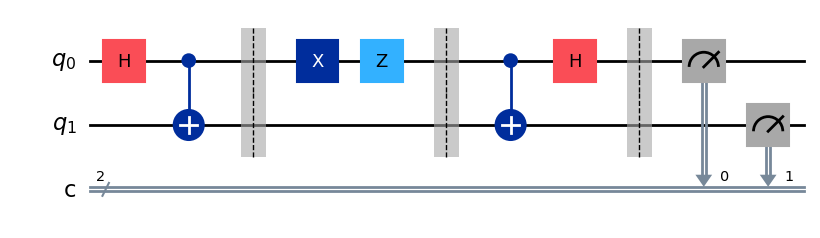

In [18]:
qc.draw("mpl")

### Run Simulation

Measurement results: {'11': 1000}


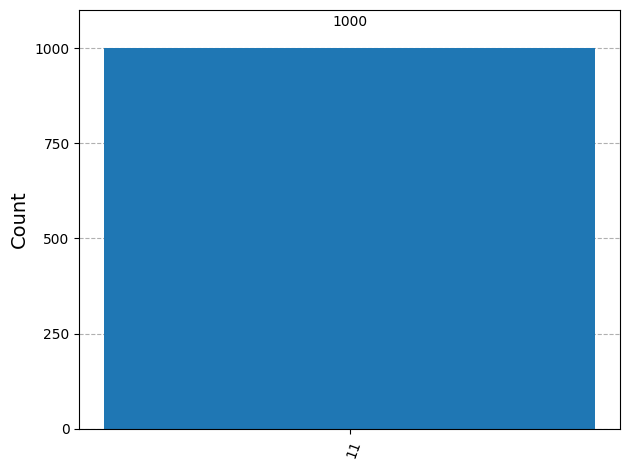

In [20]:
# Use Aer simulator 
backend = Aer.get_backend('aer_simulator')

job = backend.run(qc, shots=1000)
result = job.result()
counts = result.get_counts()

print("Measurement results:", counts)
plot_histogram(counts)

Bob successfully decoded the 2-bit message using only one transmitted qubit.